In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
def get_quantities(principal, interest_rate, loan_term):
    monthly_interest_rate = interest_rate/12
    monthly_payment = principal*monthly_interest_rate/\
        (1-1/(1+monthly_interest_rate)**loan_term)
    total_interest = monthly_payment*loan_term - principal
    return monthly_payment, total_interest

In [3]:
# check
get_quantities(285000, 0.05625, 30*12)

(1640.6207517656628, 305623.4706356386)

In [4]:
p = np.linspace(8000, 20000, 1000)
i = np.linspace(0.03, 0.09, 1000)
pp, ii = np.meshgrid(p,i)
mm = np.zeros_like(pp)
tt = np.zeros_like(pp)

In [5]:
def make_plot(loan_term):
    for row in range(mm.shape[0]):
        for col in range(mm.shape[1]):
            blah = get_quantities(pp[row, col], ii[row, col], loan_term)
            mm[row, col] = blah[0]
            tt[row, col] = blah[1]
            
    fig, ax = plt.subplots()

    levels = [150,175,200,225,250,275,300,325,350,375,400]
    CS = ax.contour(pp, ii, mm, levels=levels, cmap='cool')
    ax.clabel(CS, levels, inline=1, fontsize=10)

    CS = ax.contour(pp, ii, tt, cmap='copper')
    ax.clabel(CS, CS.levels, inline=1, fontsize=10)

    ax.set_title(f'{loan_term//12} year loan ({loan_term} months)')
    ax.set_ylabel('interest rate')
    ax.set_xlabel('principal')

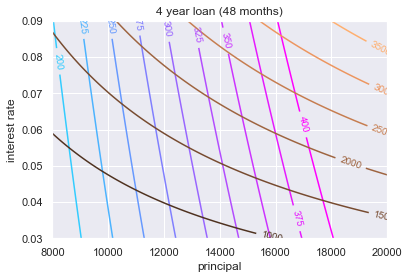

In [6]:
make_plot(48)

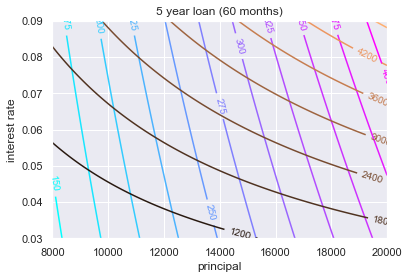

In [7]:
make_plot(60)

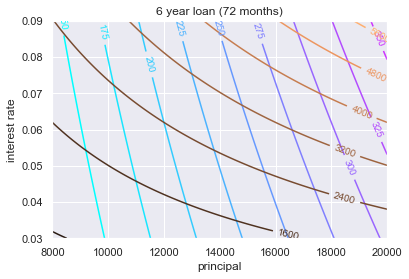

In [8]:
make_plot(72)